In [55]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame

In [56]:
df = read_csv('UNRATE.csv', header=0, index_col=0)

In [57]:
X = df.values

In [58]:
size = int(len(X) * 0.7)

In [59]:
train, test = X[0:size], X[size:len(X)]

In [60]:
history = [x for x in train]

In [61]:
predictions = list()

In [62]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.660042, expected=0.672098
predicted=0.671543, expected=0.633468
predicted=0.633317, expected=0.643453
predicted=0.637299, expected=0.653213
predicted=0.651533, expected=0.653213
predicted=0.654412, expected=0.653213
predicted=0.651904, expected=0.662758
predicted=0.664982, expected=0.653213
predicted=0.655399, expected=0.643453
predicted=0.642519, expected=0.643453
predicted=0.641298, expected=0.633468
predicted=0.631923, expected=0.643453
predicted=0.640800, expected=0.623249
predicted=0.622032, expected=0.633468
predicted=0.630937, expected=0.623249
predicted=0.622076, expected=0.633468
predicted=0.632840, expected=0.633468
predicted=0.633259, expected=0.623249
predicted=0.624245, expected=0.623249
predicted=0.621347, expected=0.612784
predicted=0.611965, expected=0.612784
predicted=0.610212, expected=0.602060
predicted=0.599435, expected=0.602060
predicted=0.599406, expected=0.612784
predicted=0.611199, expected=0.602060
predicted=0.602827, expected=0.579784
predicted=0.

predicted=0.688144, expected=0.698970
predicted=0.698740, expected=0.698970
predicted=0.699198, expected=0.681241
predicted=0.680686, expected=0.690196
predicted=0.688044, expected=0.681241
predicted=0.681287, expected=0.690196
predicted=0.688994, expected=0.698970
predicted=0.698660, expected=0.690196
predicted=0.693096, expected=0.672098
predicted=0.670492, expected=0.672098
predicted=0.669327, expected=0.672098
predicted=0.670258, expected=0.672098
predicted=0.670001, expected=0.643453
predicted=0.640210, expected=0.643453
predicted=0.638283, expected=0.643453
predicted=0.639886, expected=0.633468
predicted=0.631073, expected=0.633468
predicted=0.628540, expected=0.643453
predicted=0.642710, expected=0.623249
predicted=0.623551, expected=0.612784
predicted=0.608919, expected=0.623249
predicted=0.619973, expected=0.612784
predicted=0.612550, expected=0.612784
predicted=0.609408, expected=0.612784
predicted=0.611090, expected=0.602060
predicted=0.602052, expected=0.591065
predicted=0.

In [63]:
mse = mean_squared_error(test, predictions)

In [64]:
print('Test MSE: %.6f' % mse)

Test MSE: 0.000127


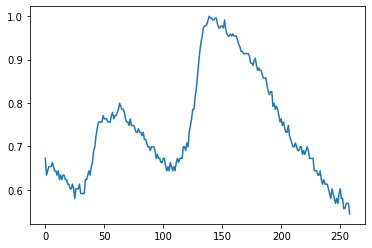

In [65]:
pyplot.plot(test)

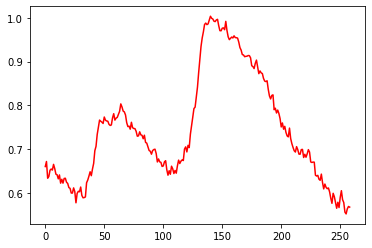

In [66]:
pyplot.plot(predictions, color='red')

In [67]:
rmse = sqrt(mse)

In [68]:
print('Root mean squared error: %.6f' % rmse)

Root mean squared error: 0.011261


In [69]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  859
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2355.863
Method:                       css-mle   S.D. of innovations              0.016
Date:                Mon, 02 Dec 2019   AIC                          -4697.725
Time:                        16:59:42   BIC                          -4664.435
Sample:                             1   HQIC                         -4684.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.097      0.923      -0.002       0.002
ar.L1.D.y      0.0426      0.034      1.247      0.213      -0.024       0.109
ar.L2.D.y      0.1779      0.034      5.209      0.0

In [70]:
residuals = DataFrame(model_fit.resid)

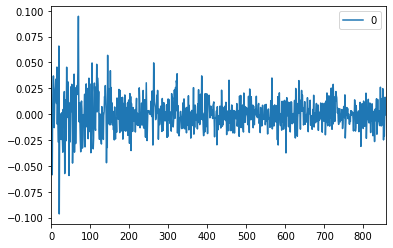

In [71]:
residuals.plot()

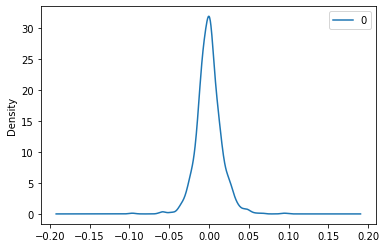

In [72]:
residuals.plot(kind='kde')

In [73]:
print(residuals.describe())

                0
count  859.000000
mean    -0.000041
std      0.015604
min     -0.096444
25%     -0.008865
50%     -0.000120
75%      0.008228
max      0.094671
